In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('./salary_predictions_data/test_features.csv')

In [4]:
data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [5]:
import copy

In [31]:
degree_major_tab = pd.crosstab(index=data['degree'],columns=data['major'])

<Figure size 700x1400 with 0 Axes>

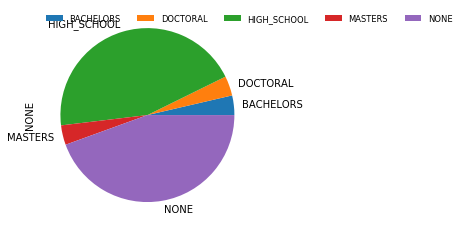

In [42]:
plt.figure(figsize=(10,20),dpi=70)
degree_major_tab.plot.pie(y='NONE')
plt.legend(fontsize='small',ncol=5,frameon=False,loc='upper left')

In [43]:
degree_major_tab.head()

major,BIOLOGY,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,LITERATURE,MATH,NONE,PHYSICS
degree,,,,,,,,,
BACHELORS,19683,19184,19316,19464,19389,19186,18983,19400,19332
DOCTORAL,19646,19134,19510,19392,19310,19477,19529,19514,19593
HIGH_SCHOOL,0,0,0,0,0,0,0,238255,0
MASTERS,19475,19643,19333,19529,19797,19399,19305,19432,19323
NONE,0,0,0,0,0,0,0,237467,0


In [44]:
jobgroup = data.groupby(by=['jobType','yearsExperience'],axis=1)

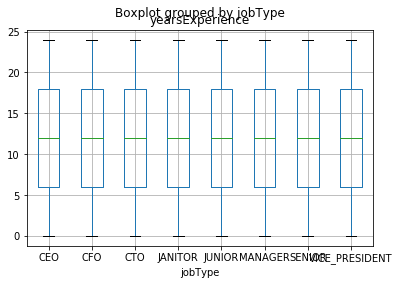

In [48]:
data.boxplot('yearsExperience','jobType')

In [49]:
#import only categorical data
salary_cat_data = data[['jobType','degree','major','industry']]

In [54]:
salary_cat_data.jobType.value_counts().count()

8

In [55]:
salary_cat_data.jobType.nunique()

8

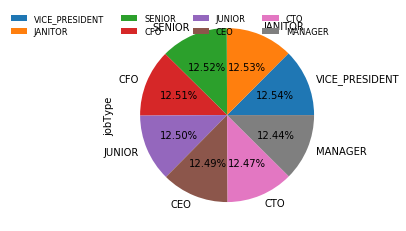

In [60]:
jobtype_dist = salary_cat_data.jobType.value_counts()
jobtype_dist.plot(kind='pie',autopct='%.2f%%')
plt.legend(fontsize='small',ncol=4,shadow=True,frameon=False)

In [61]:
#lets do hard encoding of the job type with the order as CEO, CTO, CFO , Vice president, manager, senior,jnr, janitor
salary_cat_data_hardencode1 = salary_cat_data.copy()
salary_cat_data_hardencode1.replace({'CEO':1, 'CTO':2,'CFO':3, 'VICE_PRESIDENT':4,'MANAGER':5,'SENIOR':6,'JUNIOR':7,'JANITOR':8},
                        inplace=True)

In [62]:
salary_cat_data_hardencode1.head()

,jobType,degree,major,industry
0,5,HIGH_SCHOOL,NONE,HEALTH
1,7,NONE,NONE,AUTO
2,2,MASTERS,BIOLOGY,HEALTH
3,5,HIGH_SCHOOL,NONE,OIL
4,7,DOCTORAL,BIOLOGY,OIL


In [65]:
#encoding with a dictionary list comprehension with a replace variable
salary_cat_data_hardencode2 = salary_cat_data.copy()
levels = salary_cat_data_hardencode2['jobType'].unique()
replace_type = {'jobType':{k:v for k,v in zip(levels,range(1,len(levels)+1))}}

In [66]:
replace_type

{'jobType': {'MANAGER': 1,
  'JUNIOR': 2,
  'CTO': 3,
  'SENIOR': 4,
  'CEO': 5,
  'VICE_PRESIDENT': 6,
  'JANITOR': 7,
  'CFO': 8}}

In [67]:
salary_cat_data_hardencode2.replace(replace_type['jobType'])

,jobType,degree,major,industry
0,1,HIGH_SCHOOL,NONE,HEALTH
1,2,NONE,NONE,AUTO
2,3,MASTERS,BIOLOGY,HEALTH
3,1,HIGH_SCHOOL,NONE,OIL
4,2,DOCTORAL,BIOLOGY,OIL
5,3,MASTERS,COMPSCI,FINANCE
6,4,MASTERS,COMPSCI,SERVICE
7,5,BACHELORS,BIOLOGY,SERVICE
8,1,DOCTORAL,PHYSICS,HEALTH
9,6,NONE,NONE,AUTO


In [91]:
salary_cat_data = data[['jobType','degree','major','industry']]

In [94]:
salary_cat_data = salary_cat_data.astype('category')

In [95]:
salary_cat_data.dtypes

jobType     category
degree      category
major       category
industry    category
dtype: object

In [105]:
##label encoding method - one is via getting the categorical attributor codes and assign them 
## two - using sklearn LabelEncoder from its preprocessing package
salary_lblencode = salary_cat_data.copy()

In [106]:
salary_lblencode['jobType'] = salary_lblencode['jobType'].cat.codes

In [107]:
salary_lblencode.head()

,jobType,degree,major,industry
0,5,HIGH_SCHOOL,NONE,HEALTH
1,4,NONE,NONE,AUTO
2,2,MASTERS,BIOLOGY,HEALTH
3,5,HIGH_SCHOOL,NONE,OIL
4,4,DOCTORAL,BIOLOGY,OIL


In [109]:
salary_lblencode['isMasters'] = np.where(salary_lblencode['degree']=='MASTERS',1,0)

In [110]:
salary_lblencode.head()

,jobType,degree,major,industry,isMasters
0,5,HIGH_SCHOOL,NONE,HEALTH,0
1,4,NONE,NONE,AUTO,0
2,2,MASTERS,BIOLOGY,HEALTH,1
3,5,HIGH_SCHOOL,NONE,OIL,0
4,4,DOCTORAL,BIOLOGY,OIL,0


In [111]:
from sklearn.preprocessing import LabelEncoder

In [112]:
salary_sk_lblencoder = salary_cat_data.copy()

In [113]:
lblecd = LabelEncoder()

In [115]:
lblecd.fit(salary_sk_lblencoder['jobType'])
lblecd.classes_

array(['CEO', 'CFO', 'CTO', 'JANITOR', 'JUNIOR', 'MANAGER', 'SENIOR',
       'VICE_PRESIDENT'], dtype=object)

In [116]:
salary_sk_lblencoder.head()

,jobType,degree,major,industry
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH
1,JUNIOR,NONE,NONE,AUTO
2,CTO,MASTERS,BIOLOGY,HEALTH
3,MANAGER,HIGH_SCHOOL,NONE,OIL
4,JUNIOR,DOCTORAL,BIOLOGY,OIL


In [119]:
salary_sk_lblencoder['jobType'] = lblecd.fit_transform(salary_sk_lblencoder['jobType'])

In [120]:
salary_sk_lblencoder.head()

,jobType,degree,major,industry
0,5,HIGH_SCHOOL,NONE,HEALTH
1,4,NONE,NONE,AUTO
2,2,MASTERS,BIOLOGY,HEALTH
3,5,HIGH_SCHOOL,NONE,OIL
4,4,DOCTORAL,BIOLOGY,OIL


In [ ]:
##lets try one hot encoding now - two ways again 
## one - via the pandas get dummies function and two - using the sklearn labelbinomizer and one hot encoding function

In [127]:
sal_onehot_data = salary_cat_data.copy()

from sklearn.preprocessing import LabelBinarizer

lblbinary = LabelBinarizer()

In [128]:
results = lblbinary.fit_transform(sal_onehot_data['jobType'])

In [133]:
pd.concat([sal_onehot_data,pd.DataFrame(results,columns = lblbinary.classes_)],axis = 1)      

,jobType,degree,major,industry,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,VICE_PRESIDENT
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,0,0,0,0,0,1,0,0
1,JUNIOR,NONE,NONE,AUTO,0,0,0,0,1,0,0,0
2,CTO,MASTERS,BIOLOGY,HEALTH,0,0,1,0,0,0,0,0
3,MANAGER,HIGH_SCHOOL,NONE,OIL,0,0,0,0,0,1,0,0
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,0,0,0,0,1,0,0,0
5,CTO,MASTERS,COMPSCI,FINANCE,0,0,1,0,0,0,0,0
6,SENIOR,MASTERS,COMPSCI,SERVICE,0,0,0,0,0,0,1,0
7,CEO,BACHELORS,BIOLOGY,SERVICE,1,0,0,0,0,0,0,0
8,MANAGER,DOCTORAL,PHYSICS,HEALTH,0,0,0,0,0,1,0,0
9,VICE_PRESIDENT,NONE,NONE,AUTO,0,0,0,0,0,0,0,1


In [137]:
#lets try with pandas get dummies function, now this needs to be concatenated with original data
pd.get_dummies(data=sal_onehot_data['degree'])

,BACHELORS,DOCTORAL,HIGH_SCHOOL,MASTERS,NONE
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,0,1,0
3,0,0,1,0,0
4,0,1,0,0,0
5,0,0,0,1,0
6,0,0,0,1,0
7,1,0,0,0,0
8,0,1,0,0,0
9,0,0,0,0,1


In [ ]:
## there is something called binary encoding too. But may be too much for now. Check on the below link.
#import webbrowser
#webbrowser.open_new_tab('https://www.datacamp.com/community/tutorials/categorical-data')